In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('InsuranceLogistic.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [3]:
X = df.iloc[:,:7]
X.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [4]:
y = df['insuranceclaim']
y.head()

0    1
1    1
2    0
3    0
4    1
Name: insuranceclaim, dtype: int64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=6)

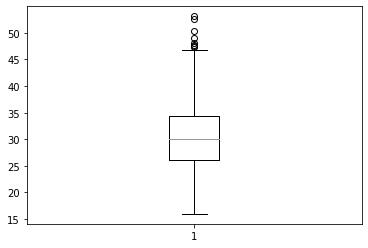

41.052249999999994


1    608
0    462
Name: insuranceclaim, dtype: int64

In [6]:
#Outlier detection using boxplot
import matplotlib.pyplot as plt

plt.boxplot(X_train['bmi'])
plt.show()

q_value = X_train.bmi.quantile(q=0.95)
print(q_value)

y_train.value_counts()

               age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.026319  0.091499  0.061800 -0.012933  0.006400  0.316429
sex      -0.026319  1.000000  0.047436  0.032628  0.074341  0.018674  0.057600
bmi       0.091499  0.047436  1.000000  0.033350  0.005660  0.158037  0.197609
children  0.061800  0.032628  0.033350  1.000000  0.021243  0.027956  0.088766
smoker   -0.012933  0.074341  0.005660  0.021243  1.000000  0.006970  0.778644
region    0.006400  0.018674  0.158037  0.027956  0.006970  1.000000 -0.001329
charges   0.316429  0.057600  0.197609  0.088766  0.778644 -0.001329  1.000000


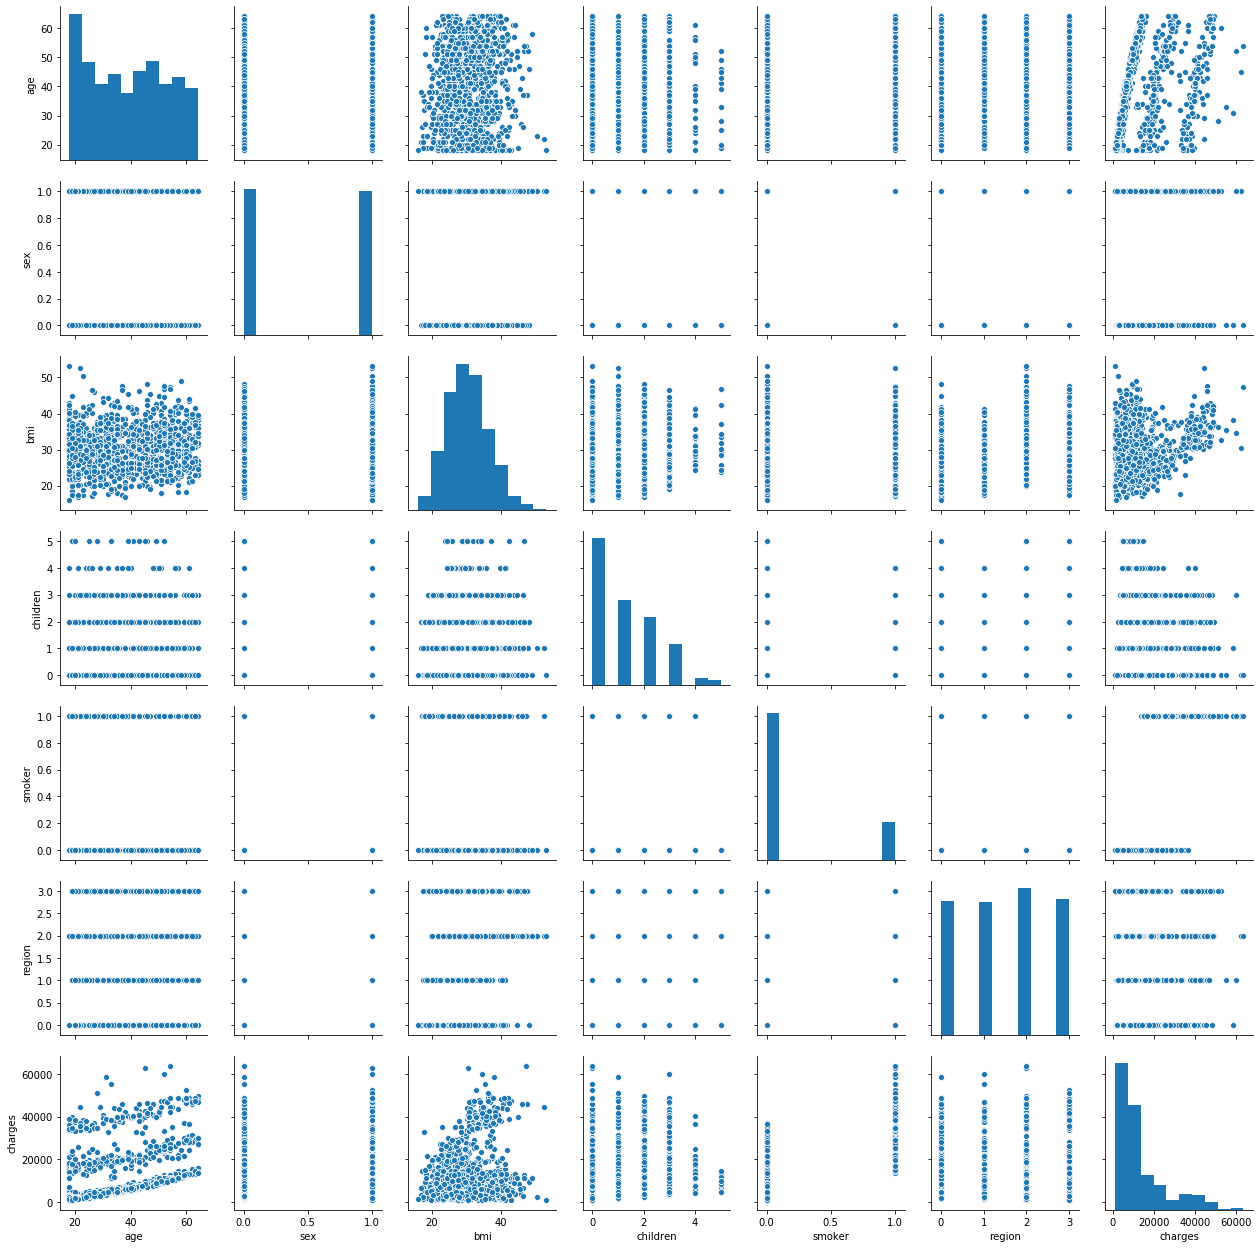

In [7]:
#Correlation check

relation = X_train.corr()
print(relation)

sns.pairplot(X_train)
#WE see that there is no high correlation among coefficients except smoker-charges

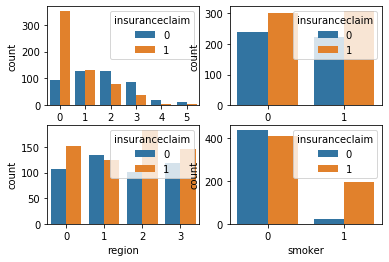

In [8]:
#Predictor check

cols = ['children','sex','region','smoker']

fig, axes = plt.subplots(2,2)

for i in range(0,2):
    i
    for j in range(0,2):
        col = cols[i * 2 + j]
        sns.countplot(x=X_train[col], hue=y_train, ax=axes[i,j])

In [9]:
#Checking if insurance claim prediction is right

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# parameters for grid search
parameters = {'C':[0.1,0.5,1,5]}

# Code starts here

# instantiate logistic regression model
lr=LogisticRegression(random_state=9)
# grid search on logistic regression

grid = GridSearchCV(estimator=lr, param_grid=parameters)
grid.fit(X_train, y_train)

# make predictions 
y_pred = grid.predict(X_test)
accuracy= accuracy_score(y_test,y_pred)

print(accuracy)

0.8544776119402985


Initial ROC_AuC: 0.8381874039938556
0.33895555412249145
ROC_AUC after predicting probabilities; 0.9257142857142857


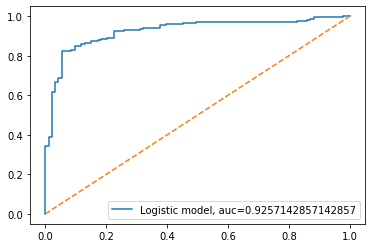

0.84
0.34
0.93


In [12]:
#Performance of classifier

from sklearn.metrics import roc_auc_score
from sklearn import metrics

score = roc_auc_score( y_test, y_pred)
print("Initial ROC_AuC:", score)

#CONSTANT STEP to predict probability of y_pred after calculating precision,recall,f1score etc.
y_pred_proba = grid.predict_proba(X_test)[:,1]
print(y_pred_proba[0])

#CONSTANT STEP to predict probability of y_pred after calculating precision,recall,f1score etc.
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC_AUC after predicting probabilities;",roc_auc)

#CONSTANT STEP to predict probability of y_pred after calculating precision,recall,f1score etc.
plt.plot(fpr,tpr,label="Logistic model, auc="+str(roc_auc))
plt.plot([0,1],[0,1], linestyle='--')
plt.legend(loc=4)
plt.show()

print(round(score,2))
print(round(y_pred_proba[0],2))
print(round(roc_auc,2))